In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read loan.csv. low_memory is True by default.
# Pandas will guess the data type chunk by chunk if low_memory is True, so each item in a single column might have 
# different data types.So, specify dtype option on import or set low_memory=False. Here, I have set low_memory=False.
loan= pd.read_csv("loan.csv",sep=',', encoding="ISO-8859-1",low_memory=False)

# Identify the number of rows and columns, datatypes
print(loan.info())
loan.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Next step is Data Cleaning

- STEP 1: Fix rows and columns
   - Rows: There are no header,footer,summary,blank rows; 
   - Columns: There is no need of merging columns in this df, Datetime columns are split to date,month and year after fixing the datatype in STEP 4)
- STEP 2: Fix missing values
- STEP 3: Standardise values
- STEP 4: Fix invalid values
- STEP 5: Filter data

__STEP2__: Fix missing values
- This dataset has 111 columns and by looking at the data, there are quite a few columns with NaN values.

In [2]:
# Let us find out the number of missing values in each column
print(loan.isnull().sum(axis=0))

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [3]:
#Find the percentage of missing values in each column
print(round(100*(loan.isnull().sum(axis=0)/len(loan.index)), 2))

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [4]:
#Dropping the columns which have more than 70% missing values for my analysis
missing_cols = loan.columns[100*(loan.isnull().sum(axis=0)/len(loan.index)) > 70]
print(missing_cols)
print('Number of cols with > 70% missing values: '+ str(len(missing_cols)))

loan = loan.drop(missing_cols, axis=1)
print(loan.shape) # Left with 55 cols out of 111 columns

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [5]:
#Check once again for null values
print(round(100*(loan.isnull().sum(axis=0)/len(loan.index)), 2))

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [6]:
# desc and mths_since_last_delinq have 32% and 64% missing values resp. We are not going to use both these cols for our analysis
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)
print(round(100*(loan.isnull().sum(axis=0)/len(loan.index)), 2))

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [7]:
print(loan.shape) # Left with 53 cols
# Further analysing these 53 columns, collections_12_mths_ex_med, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt 
# and tax_liens has 0 or NA as values. Hence dropping off these columns

loan = loan.drop(['collections_12_mths_ex_med', 'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1)
print(loan.shape) # Left with 53 cols
print(loan.columns)

#Checking once again for null values
print(round(100*(loan.isnull().sum(axis=0)/len(loan.index)), 2))

(39717, 53)
(39717, 48)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'pub_rec_bankruptcies'],
      dtype='object')
id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv          

Below columns still have null values.
<br> emp_title, emp_length, title, revol_util, last_pymnt_d, last_credit_pull_d, pub_rec_bankruptcies 
<br> But these contain important info for analysis. Hence, we will remove the rows(except for last_credit_pull_d since it only 0.01% null values) instead of dropping the whole column

In [8]:
loan = loan[~(loan['emp_title'].isnull() | loan['emp_length'].isnull() | loan['title'].isnull() | loan['revol_util'].isnull() | loan['last_pymnt_d'].isnull() | loan['pub_rec_bankruptcies'].isnull())]
print(loan.shape)

#Checking if any row has more than 2 missing values
print(len(loan[loan.isnull().sum(axis=1) > 2].index))

(36433, 48)
0


__STEP 3__: Standardise values - Data looks fine after fixing the missing values. 
Let us now move on with the next step 
- Standardise precision for better presentation of data
- total_pymnt,total_rec_late_fee, collection_recovery_fee column's precision is not proper. Rounding-off to 2 decimals.

In [9]:
loan['total_pymnt']= round(loan['total_pymnt'],2)
loan['total_rec_late_fee']= round(loan['total_rec_late_fee'],2)
loan['collection_recovery_fee']= round(loan['collection_recovery_fee'],2)

print(loan['collection_recovery_fee'].head(5))

1    1.11
3    0.00
4    0.00
5    0.00
6    0.00
Name: collection_recovery_fee, dtype: float64


__STEP 4__: Fix invalid values- Fixing Datatypes

In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 48 columns):
id                         36433 non-null int64
member_id                  36433 non-null int64
loan_amnt                  36433 non-null int64
funded_amnt                36433 non-null int64
funded_amnt_inv            36433 non-null float64
term                       36433 non-null object
int_rate                   36433 non-null object
installment                36433 non-null float64
grade                      36433 non-null object
sub_grade                  36433 non-null object
emp_title                  36433 non-null object
emp_length                 36433 non-null object
home_ownership             36433 non-null object
annual_inc                 36433 non-null float64
verification_status        36433 non-null object
issue_d                    36433 non-null object
loan_status                36433 non-null object
pymnt_plan                 36433 non-null object
url       

In [11]:
# It is observed that int_rate and revol_util contain float values but their datatype is object. Convert them to float
loan['int_rate']=loan['int_rate'].str.strip('%').astype(float)
loan['revol_util']=loan['revol_util'].str.strip('%').astype(float)
print(loan[['int_rate','revol_util']].info())
loan[['int_rate','revol_util']].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
int_rate      36433 non-null float64
revol_util    36433 non-null float64
dtypes: float64(2)
memory usage: 853.9 KB
None


,int_rate,revol_util
1,15.27,9.4
3,13.49,21.0
4,12.69,53.9
5,7.90,28.3
6,15.96,85.6


In [12]:
# There are 4 date columns whose datatype is object in the dataframe. Let us convert them to datetime
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x: datetime.strptime(x, '%b-%y'))
loan['last_pymnt_d'] = loan['last_pymnt_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
loan['last_credit_pull_d'] = loan['last_credit_pull_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 48 columns):
id                         36433 non-null int64
member_id                  36433 non-null int64
loan_amnt                  36433 non-null int64
funded_amnt                36433 non-null int64
funded_amnt_inv            36433 non-null float64
term                       36433 non-null object
int_rate                   36433 non-null float64
installment                36433 non-null float64
grade                      36433 non-null object
sub_grade                  36433 non-null object
emp_title                  36433 non-null object
emp_length                 36433 non-null object
home_ownership             36433 non-null object
annual_inc                 36433 non-null float64
verification_status        36433 non-null object
issue_d                    36433 non-null datetime64[ns]
loan_status                36433 non-null object
pymnt_plan                 36433 non-null object
u

Splitting columns as part of STEP 1

In [13]:
#Split the 4 datetime columns ('issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d') to month and year

loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year

loan['last_pymnt_d_month']= loan['last_pymnt_d'].dt.month
loan['last_pymnt_d_year']= loan['last_pymnt_d'].dt.year

loan['last_credit_pull_d_month']= loan['last_credit_pull_d'].dt.month
loan['last_credit_pull_d_year']= loan['last_credit_pull_d'].dt.year

loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'pub_rec_bankruptcies', 'issue_d_month',
       'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year',
       'last_pymnt_d_month', 'last_pymnt_d_year', 'last_credit_pull_d_month',
       'last_credit_pull_d_year

In [14]:
#Check if the year is greater than 2011
print(len(loan[loan['issue_d_year'] > 2011 ]))
print(len(loan[loan['earliest_cr_line_year'] > 2011 ]))
#There are 49 rows with year >2011 in 'earliest_cr_line_year' column
loan[loan['earliest_cr_line_year'] > 2011 ]

#We see '2068','2067','2066','2065','2063','2062' etc. This is an error. i.e. 01-09-1968 is interpreted as 01-09-2068

loan[(loan['earliest_cr_line_year'] > 2011) &  (loan['id']==1042802)]

#data.loc[<row selection>, <column selection>]
loan.loc[loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan['earliest_cr_line_year'] - 100

#Check again
loan[loan['id']==1042802]

0
50


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,application_type,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
1764,1042802,1272895,5500,5500,5500.0,36 months,7.51,171.11,A,A3,...,INDIVIDUAL,0.0,12,2011,9,1968,2,2012,9,2015


In [15]:
# Extract numeric part from emp_length

emp_length_dict = {'< 1 year' : 0,'1 year' : 1,'2 years' : 2,'3 years' : 3,'4 years' : 4,'5 years' : 5,'6 years' : 6,
                   '7 years' : 7,'8 years' : 8,'9 years' : 9,'10+ years' : 10}
loan = loan.replace({"emp_length": emp_length_dict })
loan[['id','emp_length']].head(10)

,id,emp_length
1,1077430,0
3,1076863,10
4,1075358,1
5,1075269,3
6,1069639,8
7,1072053,9
9,1071570,0
10,1070078,5
11,1069908,10
12,1064687,0


In [16]:
#Check number of columns we are left with
print(loan.shape)
loan.columns

(36433, 56)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'policy_code',
       'application_type', 'pub_rec_bankruptcies', 'issue_d_month',
       'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year',
       'last_pymnt_d_month', 'last_pymnt_d_year', 'last_credit_pull_d_month',
       'last_credit_pull_d_year

Out of the remaining columns, we may not require all of them for the analysis.
1. __id__- Data present in this column is not useful for analysis
2. __member_id__ -Data present in this column is not useful for analysis
3. __pymnt_plan__- contains only single value('n') for all the rows. Not useful for analysis
4. __url__- link to lending club page for each member. Not goin to be of much use for our analysis
5. __zip_code__ - Not of much use for the analysis. Instead, we can use 'addr_state' column to look at the distribution across all the states
6. __initial_list_status__- contains only single value('f') for the entire column
7. __out_prncp__- This column has '0' as the value. Hence, can be dropped off
8. __out_prncp_inv__- This column has '0' as the value. Hence, can be dropped off
9. __policy_code__ - contains only single value('1') for the entire column
10. __application_type__ - contains only single value('INDIVIDUAL') for the entire column

In [17]:
#Drop above columns and check again for the columns we are left with
loan = loan.drop(['id', 'member_id','pymnt_plan','url','zip_code','initial_list_status','out_prncp','out_prncp_inv','policy_code','application_type'], axis=1)
print(loan.shape) 
print(loan.columns)

(36433, 46)
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_year',
       'earliest_cr_line_month', 'earliest_cr_line_year', 'last_pymnt_d_month',
       'last_pymnt_d_year', 'last_credit_pull_d_month',
       'last_credit_pull_d_year'],
      dtype='object')


__Below columns are customer behaviour variables and will not be available at the time of funding the loan. Hence these columns can be dropped off__
1. total_pymnt
2. total_pymnt_inv
3. total_rec_prncp
4. total_rec_int
5. total_rec_late_fee
6. recoveries
7. collection_recovery_fee

In [18]:
loan = loan.drop(['total_pymnt', 'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee'], axis=1)
print(loan.shape)

(36433, 39)


In [19]:
# dropping 'months' from term column.i.e. from 36 months,60 months to 36,60 for easy analysis
loan['term'] = loan['term'].str[1:3:1].astype('int64')

In [20]:
# Consider only the data which are "Fully Paid" or "Charged Off" since "Current" is not going to be of any use for the analysis
loan = loan[(loan['loan_status']=='Fully Paid') | (loan['loan_status']=='Charged Off')]
loan.shape

(35367, 39)

### __UNIVARIATE ANALYSIS__

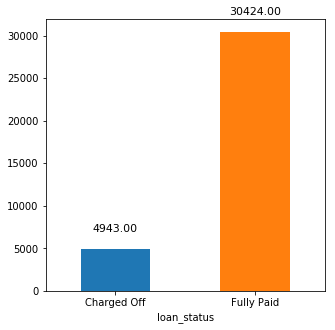

In [21]:
# loan_status distribution

plt.figure(figsize=(5,5))
c=loan.groupby('loan_status').loan_amnt.count().plot.bar()
for p in c.patches:
    c.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 20),
                 textcoords='offset points')
plt.xticks(rotation=0)
plt.show()

Average of loan amount:  11133.071790086804


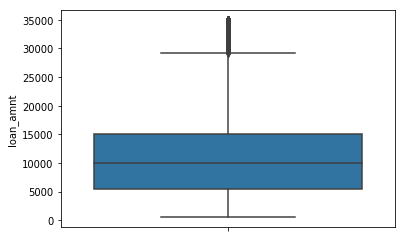

In [22]:
# loan amount distribution- Mean
sns.boxplot(y='loan_amnt', data=loan)
print("Average of loan amount: ",loan.loan_amnt.mean())

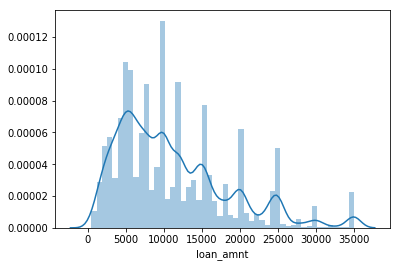

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


In [23]:
# loan amount distibution
sns.distplot(loan['loan_amnt'])
plt.show()
loan.groupby('loan_status')['loan_amnt'].describe()

Observation:
1. Mean is higher than the median
2. 'Charged Off' loans have higher average loan_amount compared to 'Fully Paid' loans
3. Most of the loans given are below 75 percentile

In [24]:
def loan_amntbarplot(col):
    plt.figure(figsize=(5,5))
    c=loan.groupby(col).loan_amnt.count().plot.bar()
    for p in c.patches:
        c.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 20),
                 textcoords='offset points')
    plt.xticks(rotation=0)
    plt.show()

In [25]:
loan['loan_status_new'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

# converting loan_status_new to integer type
loan['loan_status_new'] = loan['loan_status_new'].apply(lambda x: pd.to_numeric(x))
loan['loan_status_new'].value_counts()

0    30424
1     4943
Name: loan_status_new, dtype: int64

In [26]:
def loan_statusbarplot(col):
    c=sns.barplot(x=col, y='loan_status_new', data=loan)
    for p in c.patches:
        c.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 20),
                 textcoords='offset points')
    plt.xticks(rotation=0)
    plt.show()

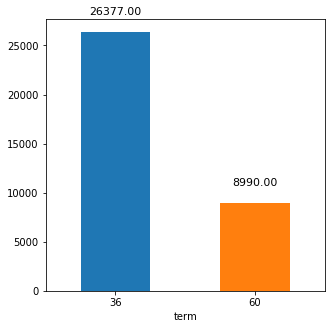

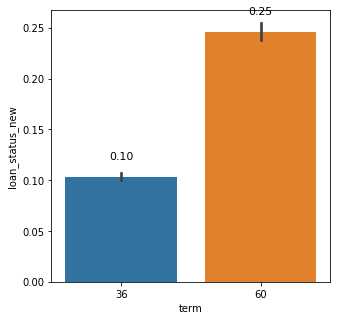

In [27]:
# 'Term' column analysis
loan_amntbarplot('term')
plt.figure(figsize=(5,5))
loan_statusbarplot('term')

__Observation__
1. Most of the loans are granted for '36 months'
2. Loans granted for 60 months are more likely to default compared to 36 month loans

In [28]:
# 'int_rate' column analysis
loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


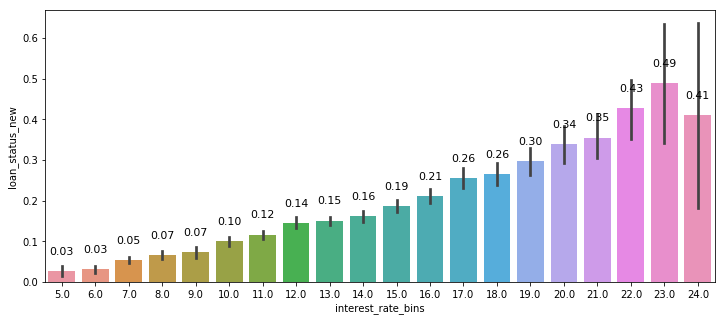

In [29]:
loan['interest_rate_bins'] = round(loan['int_rate'])
plt.figure(figsize=(12,5))
loan_statusbarplot('interest_rate_bins')

__Observation__
1. int_rate varies from 5.42 to 24.4 percentage
2. interest rates for Charged Off loans are higher than Fully paid loans
3. high int_rates default more, which is expected

In [30]:
# 'installment' column analysis
loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


__Observation__: Charged_Off loans have high average installment compared to Fully Paid loans

B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: grade, dtype: int64


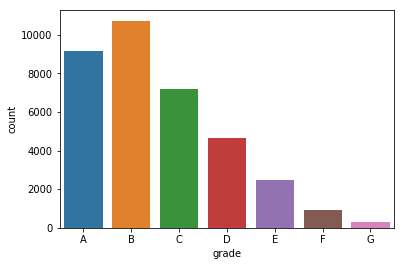

In [31]:
# Grade and Subgrade columns analysis
print(loan.grade.value_counts())
sns.countplot(loan['grade'], order=sorted(loan.grade.unique()))
plt.show()

In [32]:
loan.sub_grade.value_counts()

A4    2662
B3    2589
A5    2487
B5    2444
B4    2247
C1    1874
B2    1825
C2    1791
A3    1630
B1    1613
C3    1369
A2    1356
D2    1184
C4    1095
C5    1052
D3    1022
A1    1005
D4     848
D1     846
D5     763
E1     691
E2     566
E3     482
E4     394
E5     348
F1     293
F2     214
F3     160
F4     136
F5      99
G1      88
G2      74
G4      54
G3      41
G5      25
Name: sub_grade, dtype: int64

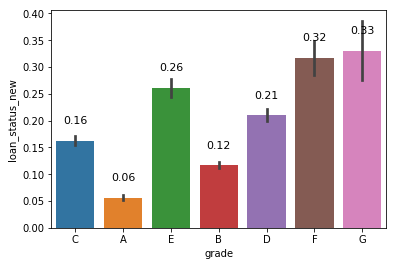

In [33]:
#Grade versus loan_status
loan_statusbarplot('grade')

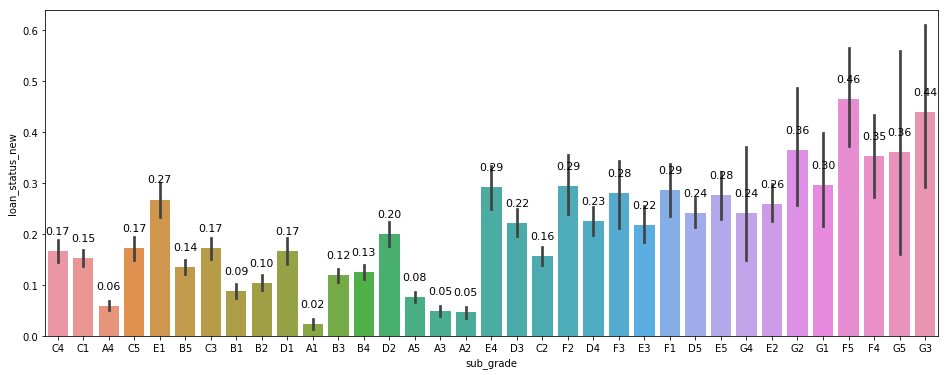

In [34]:
# sub_grade versus loan_status
plt.figure(figsize=(16, 6))
loan_statusbarplot('sub_grade')

__Observation__:
1. As the grade of loan moves from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan.
2. As the sub_grade versus loan_status plot shows, A1 is better than A2, A3 is better than A4 and so on.
3. Grades A,B,C are relatively safe whereas D,E,F,G loans are less safe.

In [35]:
# emp_title column analysis
top15emp_title=loan.emp_title.value_counts().head(15)
top15emp_title

US Army                    128
Bank of America            106
IBM                         65
AT&T                        57
Kaiser Permanente           55
Wells Fargo                 52
UPS                         51
USAF                        51
US Air Force                50
Walmart                     44
Lockheed Martin             42
U.S. Army                   40
United States Air Force     40
Verizon Wireless            40
USPS                        39
Name: emp_title, dtype: int64

__Observation__: Most of the loans are taken by US Army followed by Bank of America and then IBM

In [36]:
# emp_length column analysis
loan.emp_length.value_counts()

10    8028
2     4083
0     3978
3     3833
4     3206
5     3043
1     2959
6     2062
7     1638
8     1361
9     1176
Name: emp_length, dtype: int64

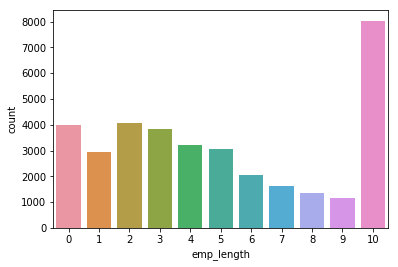

In [37]:
sns.countplot(loan['emp_length'])
plt.show()

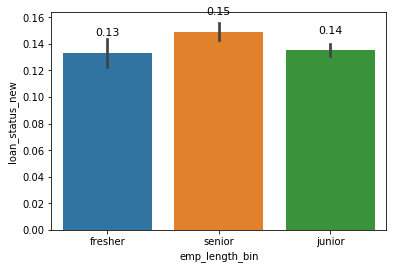

In [38]:
def categorise_emp_length(emp_length):
    if emp_length < 1:
        return 'fresher'
    elif emp_length >= 1 and emp_length < 7:
        return 'junior'
    else:
        return 'senior'
    
loan['emp_length_bin'] = loan['emp_length'].apply(lambda x: categorise_emp_length(x))
loan_statusbarplot('emp_length_bin')

__Observation__: 
1. Most of the loan takers have employment length of 10 or more years
2. Higher the years of employment , higher are the default chances. 
3. That may be because freshers tend to take less loans since they have less responsibility

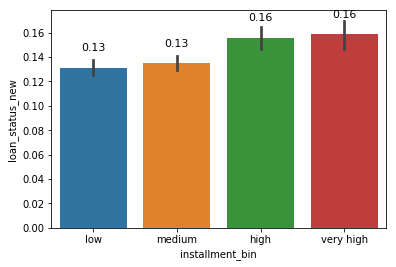

In [39]:
def categorise_installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
loan['installment_bin'] = loan['installment'].apply(lambda x: categorise_installment(x))
loan_statusbarplot('installment_bin')

__Observation__: Higher the installment amount, the higher the default rate.

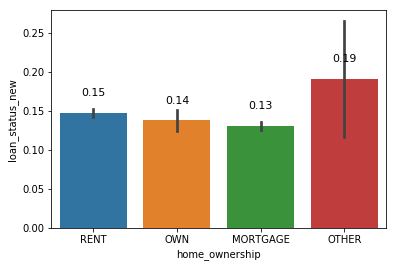

In [40]:
# home_ownership column analysis
loan_statusbarplot('home_ownership')

__Observation__: 'Other' is likely to default more compared to other values such as Rent, Own and Mortgage.

In [41]:
# annual_inc column analysis
loan['annual_inc'].describe()

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

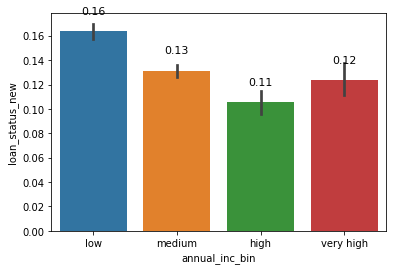

In [42]:
def annual_inc(amt):
    if amt<50000:
        return 'low'
    elif amt> 50000 and amt<=100000:
        return 'medium'
    elif amt> 100000 and amt<=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc_bin'] = loan['annual_inc'].apply(lambda n: annual_inc(n))
loan_statusbarplot('annual_inc_bin')

__Observation__: Lower annual income has higher default rates

In [43]:
# verification_status column analysis 
loan.groupby(['verification_status','loan_status']).describe()

annual_inc                              \
                                     count          mean           std   
verification_status loan_status                                          
Not Verified        Charged Off     1770.0  55675.495424  44816.635375   
                    Fully Paid     13070.0  61913.903148  57762.977033   
Source Verified     Charged Off     1322.0  59911.934070  42707.624181   
                    Fully Paid      7842.0  69169.046163  89064.170413   
Verified            Charged Off     1851.0  72261.544543  51358.426173   
                    Fully Paid      9512.0  82062.028866  51618.604470   

                                                                     \
                                    min      25%      50%       75%   
verification_status loan_status                                       
Not Verified        Charged Off  4080.0  35000.0  48000.0   65000.0   
                    Fully Paid   4000.0  39996.0  54000.0   74980.5   
Source Verified     Charged Off  8000.0  36000.0  50000.0   70000.0   
                    Fully Paid   4800.0  40000.0  56000.0   80000.0   
Verified            Charged Off  9600.0  45000.0  62000.0   86000.0   
                    Fully Paid   6000.0  51000.0  72000.0  100000.0   

                                            delinq_2yrs            ...   term  \
                                        max       count      mean  ...    75%   
verification_status loan_status                                    ...          
Not Verified        Charged Off   840000.00      1770.0  0.170621  ...   60.0   
                    Fully Paid   3900000.00     13070.0  0.136725  ...   36.0   
Source Verified     Charged Off   700053.85      1322.0  0.159607  ...   60.0   
                    Fully Paid   6000000.00      7842.0  0.149707  ...   36.0   
Verified            Charged Off  1250000.00      1851.0  0.163695  ...   60.0   
                    Fully Paid   1200000.00      9512.0  0.146972  ...   60.0   

                                      total_acc                             \
                                  max     count       mean        std  min   
verification_status loan_status                                              
Not Verified        Charged Off  60.0    1770.0  20.798870  11.069552  3.0   
                    Fully Paid   60.0   13070.0  21.359602  11.146442  3.0   
Source Verified     Charged Off  60.0    1322.0  19.892587  10.980843  3.0   
                    Fully Paid   60.0    7842.0  21.061846  11.204235  3.0   
Verified            Charged Off  60.0    1851.0  23.933009  11.752715  2.0   
                    Fully Paid   60.0    9512.0  24.571489  11.555644  3.0   

                                                         
                                  25%   50%   75%   max  
verification_status loan_status                          
Not Verified        Charged Off  12.0  19.0  28.0  70.0  
                    Fully Paid   13.0  20.0  28.0  90.0  
Source Verified     Charged Off  12.0  18.0  26.0  63.0  
                    Fully Paid   13.0  19.0  28.0  87.0  
Verified            Charged Off  15.0  23.0  31.0  63.0  
                    Fully Paid   16.0  23.0  32.0  75.0  

[6 rows x 224 columns]

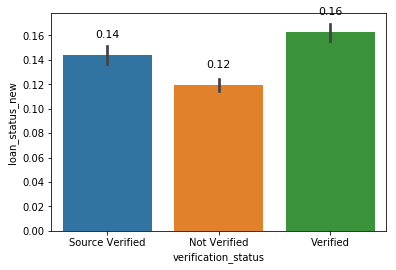

In [44]:
loan_statusbarplot('verification_status')

__Observation__: It is observed that 'verified','Source verified' loans default more than 'Not verified' ones which is surprising.

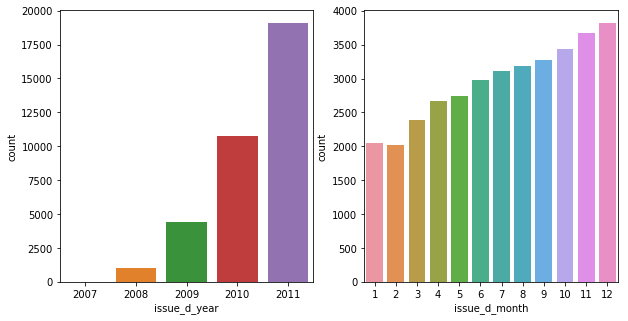

In [45]:
# issue_d column analysis
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(loan['issue_d_year'], order=sorted(loan.issue_d_year.unique()))

plt.subplot(122)
sns.countplot(loan['issue_d_month'], order=sorted(loan.issue_d_month.unique()))

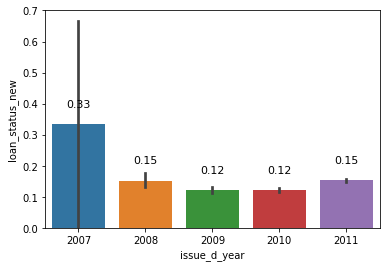

In [46]:
loan_statusbarplot('issue_d_year')

__Observation__:
1. Loans issued have increased over the years from 2007 to 2011
2. Maximum number of loans are issued in December month
3. Default rate had suddenly increased in 2011 despite being reduced from 2007 till 2010. Hence, issue year has no significance over defaulting factor.

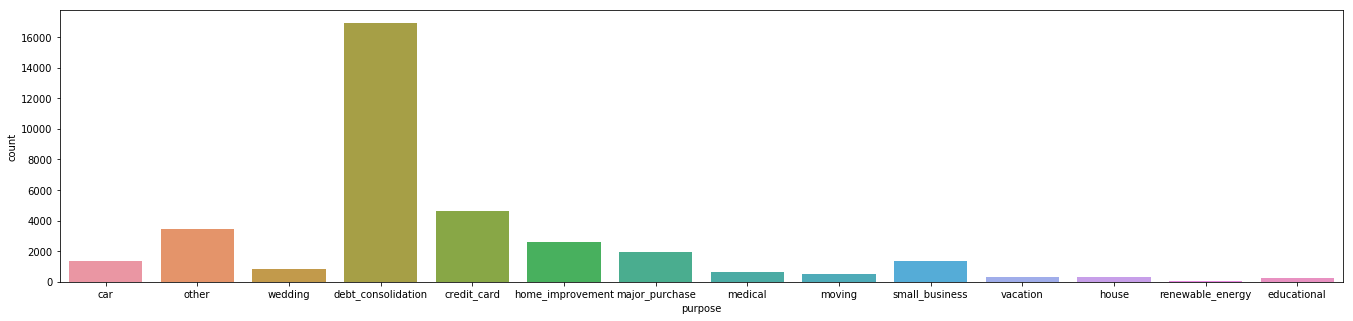

In [47]:
# purpose column analysis
plt.figure(figsize=(23,5))
sns.countplot(loan['purpose'])

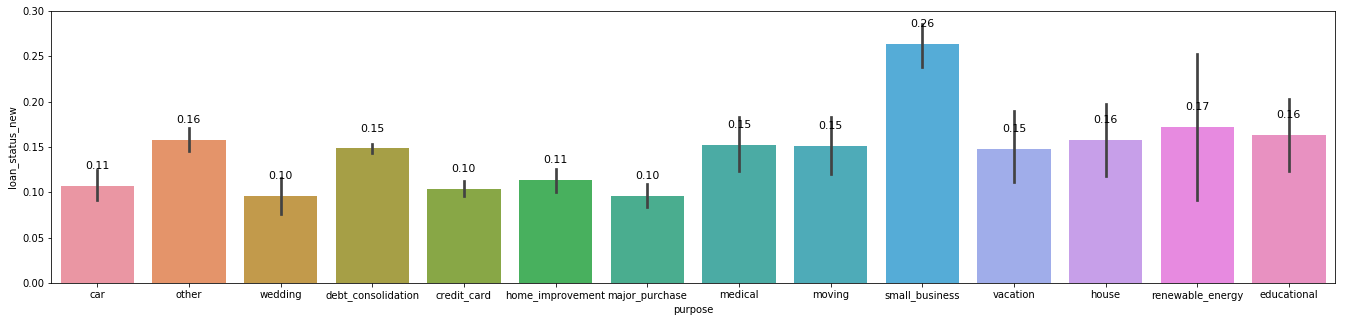

In [48]:
plt.figure(figsize=(23,5))
loan_statusbarplot('purpose')

__Observation__:
1. Most loans are issued for the purpose of 'debt_consolidation'
2. 'small_business' loans default the most followed by 'renewable_energy'

In [49]:
# title column analysis
print(loan.title.describe())
loan.title.value_counts().head(5)

count                  35367
unique                 17662
top       Debt Consolidation
freq                    1975
Name: title, dtype: object


Debt Consolidation         1975
Debt Consolidation Loan    1541
Personal Loan               589
Consolidation               462
debt consolidation          440
Name: title, dtype: int64

In [50]:
#'title' is derived from the column 'purpose'. Hence, this column can be dropped off.
loan= loan.drop('title',axis=1)
print('loan column dropped from dataframe')

loan column dropped from dataframe


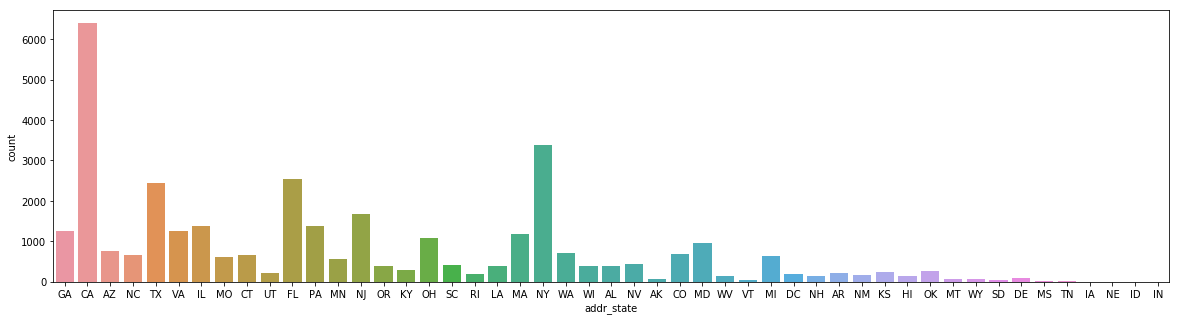

In [51]:
# addr_state column analysis
plt.figure(figsize=(20,5))
sns.countplot(loan['addr_state'])

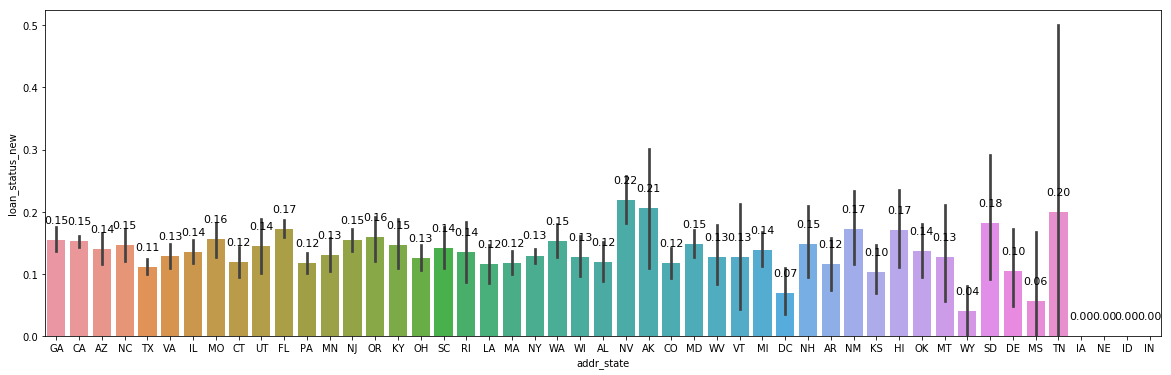

In [52]:
plt.figure(figsize=(20,6))
loan_statusbarplot('addr_state')

__Observation__:
1. California has the maximum number of loans issued followed by New York and then Florida
2. Nevada has the highest default rate followed by Alaska and then Tennessee but these states have lower number of loans issued. Hence, addr_state parameter doesnt add much value to the analysis

In [53]:
# dti variable analysis
loan.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

In [54]:
# binning data in dti
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or pandas.IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
        * sequence of scalars : Defines the bin edges all

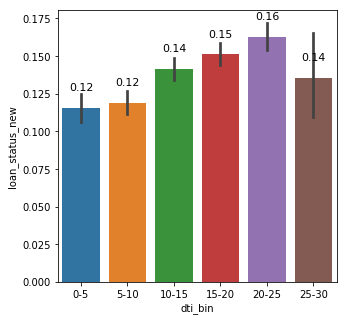

In [55]:
loan['dti_bin']=pd.cut(loan['dti'],[0,5,10,15,20,25,30],labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
plt.figure(figsize=(5,5))
loan_statusbarplot('dti_bin')

__Observation__: Higher 'dti' signifies higher default rates

In [56]:
# delinq_2yrs column analysis
loan.delinq_2yrs.value_counts()

0     31533
1      2939
2       614
3       189
4        53
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

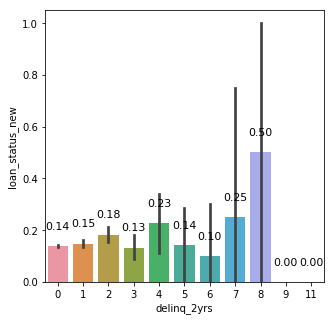

In [57]:
plt.figure(figsize=(5,5))
loan_statusbarplot('delinq_2yrs')

__Observation__: There are higher chances of default if this variable is equal to 8.

In [58]:
# earliest_cr_line column analysis
loan.earliest_cr_line_year.value_counts().head(10)

2000    2947
1999    2695
1998    2569
2001    2308
1997    2207
1996    2003
1995    1903
1994    1785
2002    1762
2003    1698
Name: earliest_cr_line_year, dtype: int64

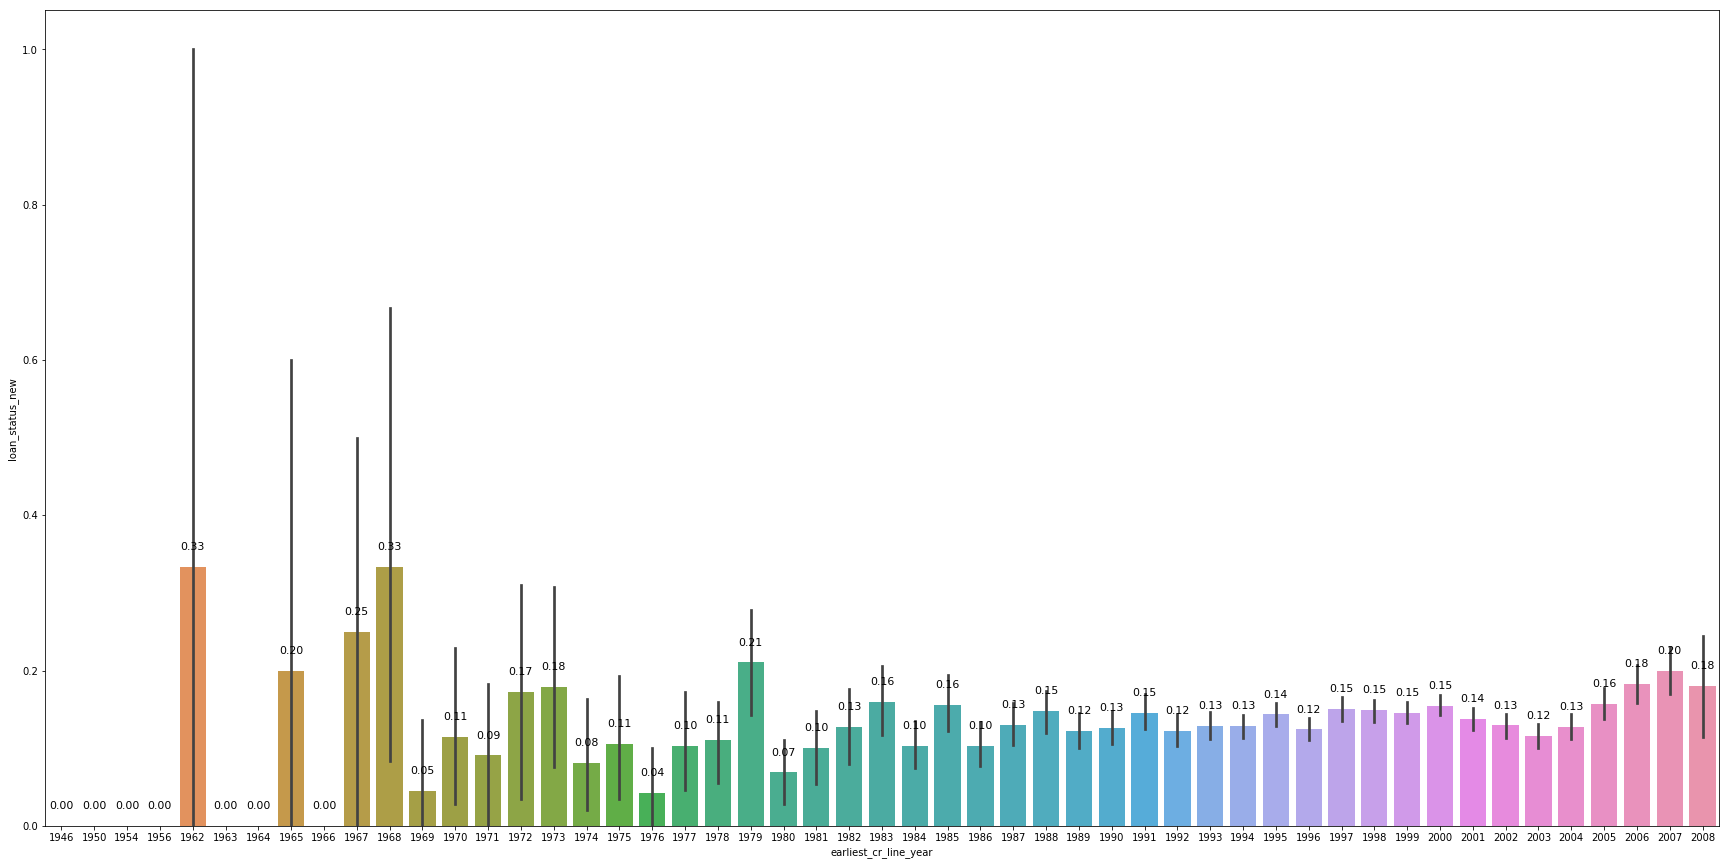

In [59]:
plt.figure(figsize=(30,15))
loan_statusbarplot('earliest_cr_line_year')

__Observation__: Not much can be infered from this varaible. Hence ignoring this column for our analysis

In [60]:
# inq_last_6mths column analysis
loan.inq_last_6mths.value_counts()

0    17183
1     9774
2     5208
3     2703
4      280
5      123
6       54
7       31
8       11
Name: inq_last_6mths, dtype: int64

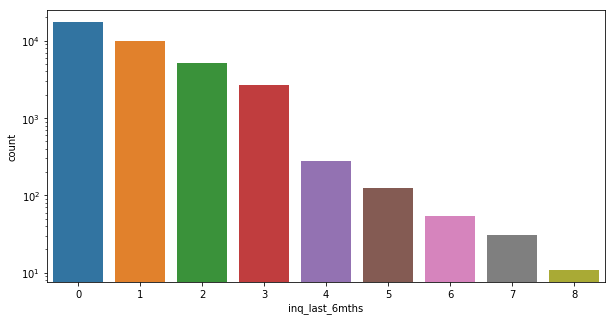

In [61]:
plt.figure(figsize=(10,5))
p=sns.countplot(loan['inq_last_6mths'])
p.set_yscale('log')

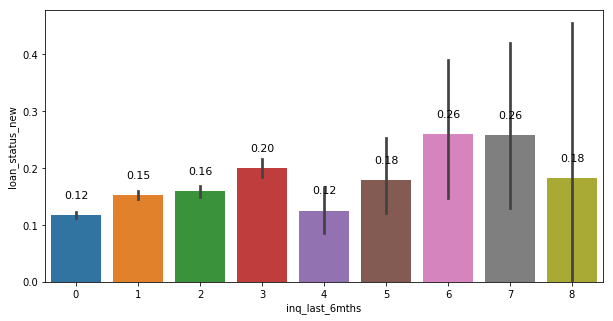

In [62]:
plt.figure(figsize=(10,5))
loan_statusbarplot('inq_last_6mths')

__Observation__: Loans with 3 or more inquiries default more

In [63]:
# open_acc column analysis
loan.groupby(['loan_status']).open_acc.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,9.308517,4.491786,2.0,6.0,9.0,12.0,38.0
Fully Paid,30424.0,9.335820,4.355764,2.0,6.0,9.0,12.0,44.0


__Observation__: No much difference between Charged Off versus Fully Paid. Hence, open_acc variable doesnt contribute much to the analysis

In [64]:
# pub_rec column analysis
loan.pub_rec.value_counts()

0    33516
1     1798
2       44
3        7
4        2
Name: pub_rec, dtype: int64

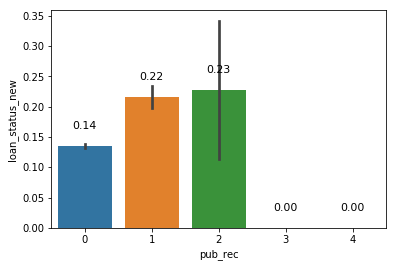

In [65]:
loan_statusbarplot('pub_rec')

__Observation__: Having 1 or more public derogatory records increases the chances of defaulting

In [66]:
# revol_bal and revol_util columns analysis
loan.groupby(['loan_status']).revol_bal.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13680.089824,14768.969553,0.0,4246.5,9562.0,17809.0,147365.0
Fully Paid,30424.0,13316.918847,15820.937992,0.0,3711.0,8833.0,16941.0,149588.0


In [67]:
loan.groupby(['loan_status']).revol_util.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,56.157504,27.649831,0.0,35.45,59.3,79.2,99.9
Fully Paid,30424.0,47.998719,28.156580,0.0,24.50,48.2,71.2,99.9


__Observation__: There is no much difference in the mean for Charged Off versus Fully Paid in both columns

In [68]:
# total_acc column analysis
loan.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,21.730123,11.438113,2.0,13.0,20.0,29.0,70.0
Fully Paid,30424.0,22.287043,11.395624,3.0,14.0,21.0,29.0,90.0


__Observation__: There is no much difference in the mean for Charged Off versus Fully Paid

In [69]:
# last_pymnt_d column analysis
loan.last_pymnt_d_year.describe()

count    35367.000000
mean      2012.778862
std          1.414788
min       2008.000000
25%       2012.000000
50%       2013.000000
75%       2014.000000
max       2016.000000
Name: last_pymnt_d_year, dtype: float64

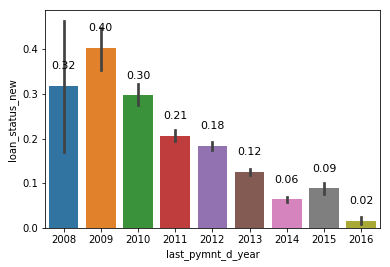

In [70]:
loan_statusbarplot('last_pymnt_d_year')

__Observation__: Most of the loans were Charged Off in the year 2009. This may be due to 2008 financial crisis. This variable does not add much to the analysis and hence ignored

In [71]:
# last_pymnt_amnt column analysis
loan.groupby('loan_status')['last_pymnt_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,331.126913,526.178060,0.01,119.3750,244.090,409.4500,12818.38
Fully Paid,30424.0,3216.920187,4749.376481,0.16,263.6625,912.985,4382.0575,36115.20


__Observation__: last payment amount is lower for Charged Off loans compared to Fully Paid. This is an expected result.

In [72]:
# last_credit_pull_d column analysis
loan.last_credit_pull_d_year.value_counts()

2016    13297
2014     5719
2015     5138
2013     4772
2012     3742
2011     1902
2010      633
2009      145
2008       19
Name: last_credit_pull_d_year, dtype: int64

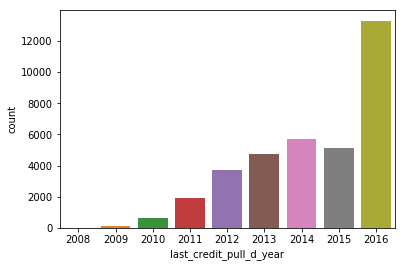

In [73]:
sns.countplot(loan['last_credit_pull_d_year'])
plt.show()

__Observation__: Fetching Credit reports have increased over the years. This means that the company is taking steps to prevent defaults

In [74]:
# pub_rec_bankruptcies column analysis
loan.pub_rec_bankruptcies.value_counts()

0.0    33898
1.0     1464
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

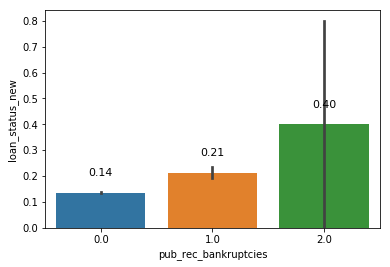

In [75]:
loan_statusbarplot('pub_rec_bankruptcies')

__Observation__: Higher the Number of public record bankruptcies, higher the likelihood of default

### Segmented Univariate Analysis

From above analysis, we understood that the following variable affect default rates -
1. term
2. int_rate
3. verification_status
4. purpose
5. grade & sub-grade
6. issue_date_year
7. annual_inc
8. emp_length
9. installment

In [76]:
# We already looked into purpose for loan and found small business have the most default rates. 
# Lets see the count of different loans too
loan.groupby('purpose').loan_status.count()

purpose
car                    1395
credit_card            4626
debt_consolidation    16911
educational             276
home_improvement       2614
house                   330
major_purchase         1973
medical                 622
moving                  523
other                  3462
renewable_energy         87
small_business         1351
vacation                332
wedding                 865
Name: loan_status, dtype: int64

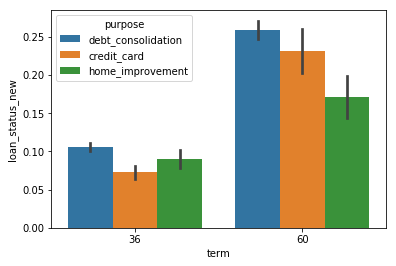

In [77]:
# As we can see debt_consolidation have the highest loans followed by credit_card,home_improvement
# Lets take these top 3 to analyze them on term, grade, int_rate, verification_status

loan = loan[(loan['purpose'] == 'credit_card') | (loan['purpose'] == 'debt_consolidation') | (loan['purpose'] == 'home_improvement')]
def purpose_barplot(col):
    sns.barplot(x=col, y='loan_status_new', hue='purpose', data=loan)
    plt.show()

purpose_barplot('term')

__observation__: As already seen 60 months term loans have more defaults. In that also, debt_consolidation have the highest default rate.So, let's analyze other variables

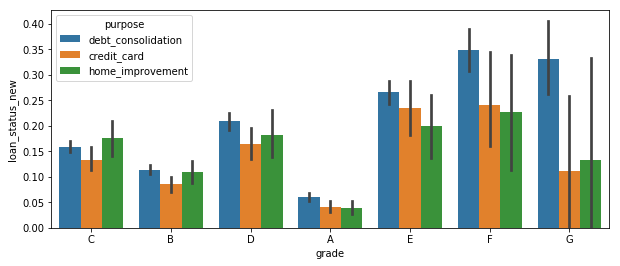

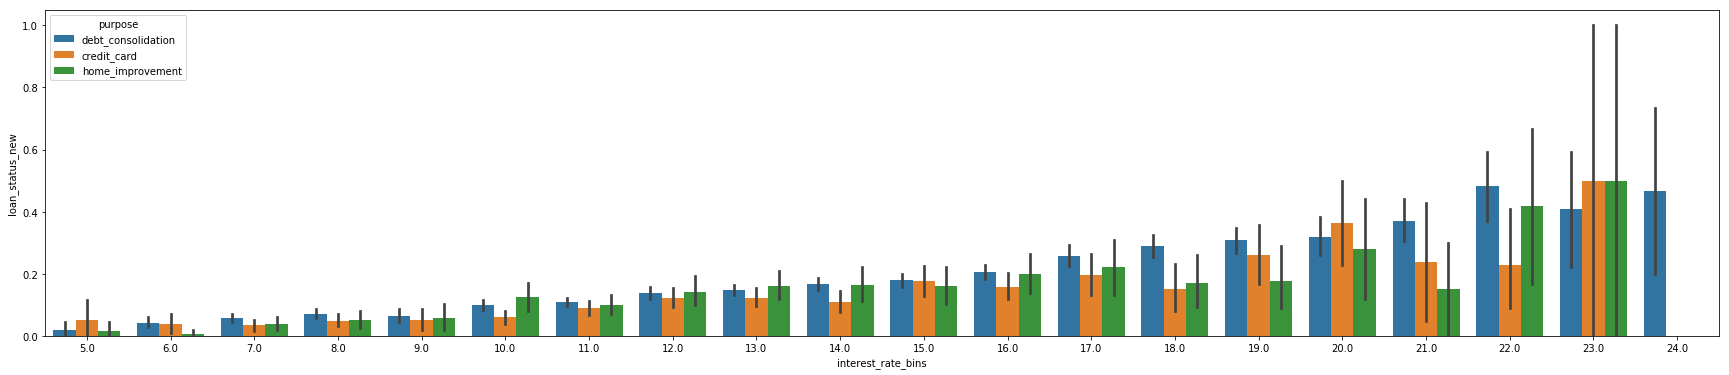

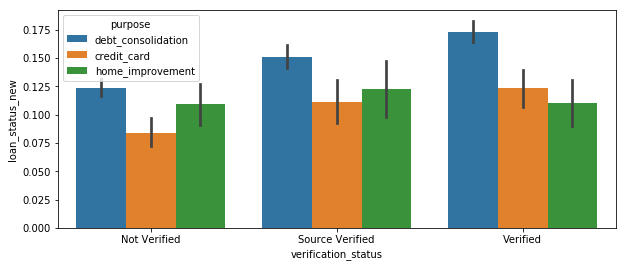

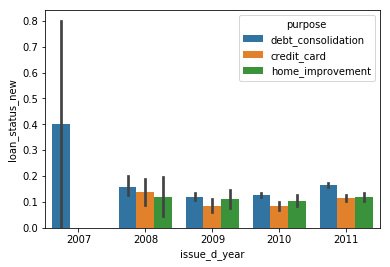

In [78]:
plt.figure(figsize=(10, 4)) 
purpose_barplot('grade')
plt.figure(figsize=(30, 6)) 
purpose_barplot('interest_rate_bins')
plt.figure(figsize=(10, 4)) 
purpose_barplot('verification_status')
purpose_barplot('issue_d_year')

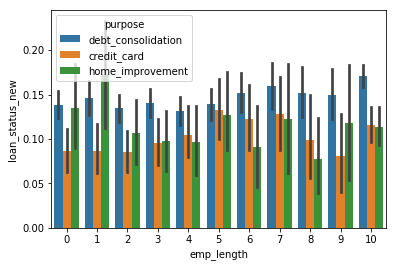

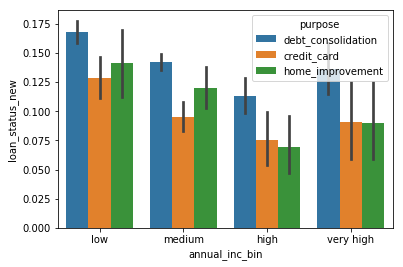

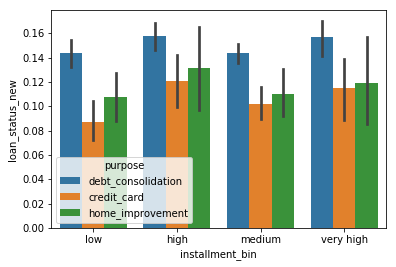

In [79]:
purpose_barplot('emp_length')
purpose_barplot('annual_inc_bin')
purpose_barplot('installment_bin')

__observation__
1. default rate for all three purpose increases as grade increases from A to F.
2. default rate is highest for debt_consolidation and grade F.
3. debt_consolidation is highest for Verified status whereas home_improvement is highest for Source Verified. So, default rate is lowest for Not Verified Status.
4. Overall debt_consolidation loans have the highest default rates.

### Bivariate Analysis
- loan_amnt vs issue_d_year
- loan_amnt vs annual_income
- loan_amnt vs revol_util
- loan_amnt vs grade
- int_rate versus term
- int_rate versus grade
- int_rate versus loan_status
- int_rate versus dti
- loan_amnt versus addr_state versus loan_status
- dti vs open_acc vs loan_status
- delinq_2yrs versus int_rate versus loan_status
- correlation chart between variables

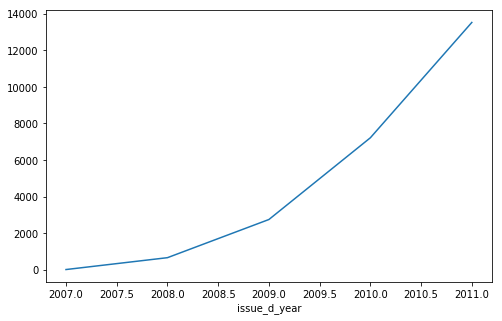

In [80]:
# loan_amnt versus issue_d over the years
plt.figure(figsize=(8,5))
loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line')
plt.show()

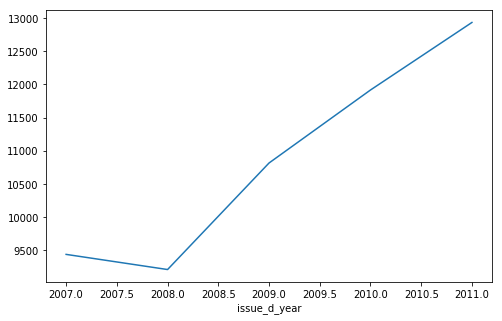

In [81]:
# average loan_amnt versus issue_d over the years
plt.figure(figsize=(8,5))
loan.groupby('issue_d_year').loan_amnt.mean().plot(kind='line')
plt.show()

__Observation__: Average loan amount dropped during '2008' financial crisis

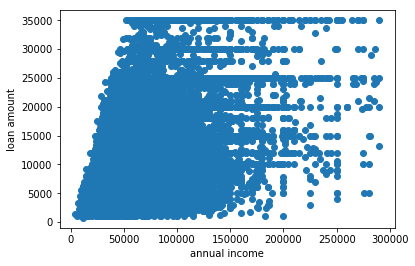

In [82]:
# loan_amnt versus annual_income
plt.scatter('annual_inc', 'loan_amnt',data=loan.loc[loan['annual_inc']<300000])
plt.xlabel('annual income')
plt.ylabel('loan amount')
plt.show()

__Observation__: Borrowers with income less than 50000 are taking loan of high amount. This seems to be risky and likelihood of default

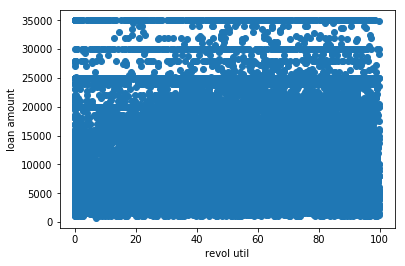

In [83]:
# loan_amnt versus revol_util
plt.scatter('revol_util', 'loan_amnt',data=loan)
plt.xlabel('revol util')
plt.ylabel('loan amount')
plt.show()

__Observation__: There have been some high value loans extended to borrowers with revolving line utilization rate of higher than 75%.

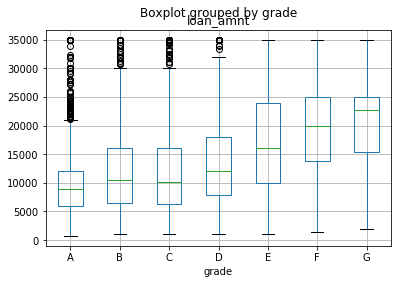

In [84]:
# loan_amnt vs grade
loan.boxplot(column='loan_amnt', by='grade')
plt.show()

__Observation__: As the loan quality degrades (A being the safest and G the riskiest), people tend to take more loans.

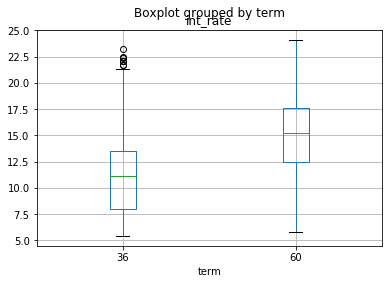

In [85]:
# int_rate versus term
loan.boxplot(column='int_rate', by='term')
plt.show()

__Observation__: Interest rates for 36 months are lower than 60 month term

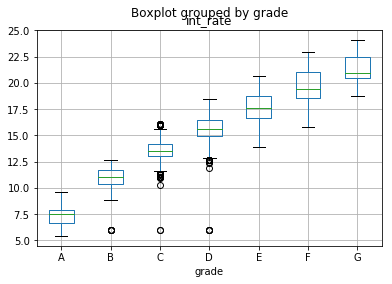

In [86]:
# int_rate versus grade
loan.boxplot(column='int_rate', by='grade')
plt.show()

__Observation__: int_rate varies directly with the grade. Larger or worst the grade, higher are the rates of interest.

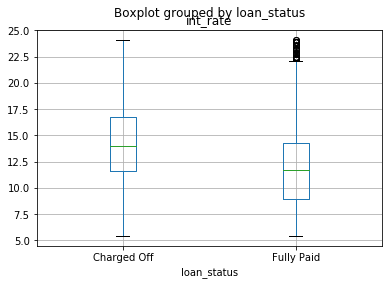

In [87]:
# int_rate versus loan_status
loan.boxplot(column='int_rate', by='loan_status')
plt.show()

__Observation__: Loans with high interest rates are more likely to default.

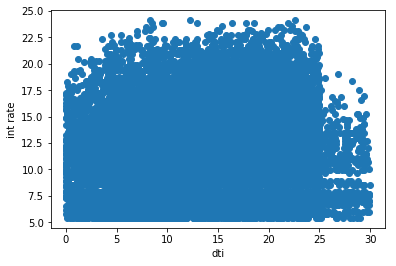

In [88]:
# int_rate versus dti
plt.scatter('dti', 'int_rate',data=loan)
plt.xlabel('dti')
plt.ylabel('int rate')
plt.show()

__Observation__: Higher interest rates should be charged for higher dti, but we see spread across all values without being differentiated in terms of interest rates

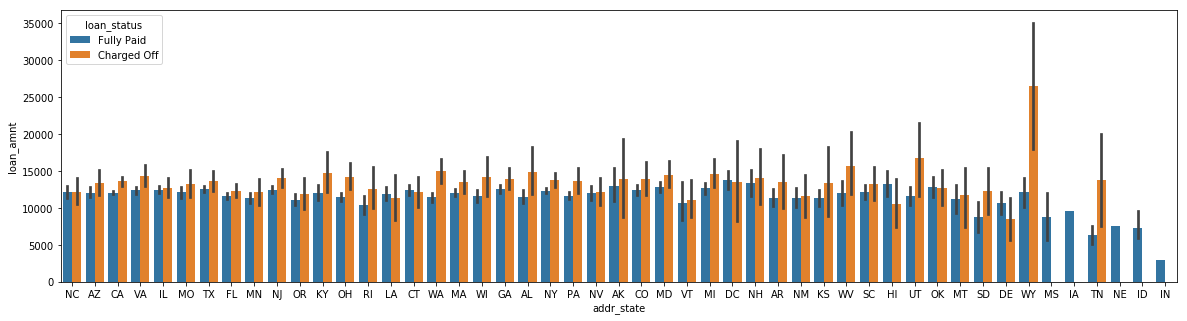

In [89]:
# loan_amnt versus addr_state versus loan_status
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=loan)
plt.show()

__Observation__: 'Wyoming(WY)' state has the highest loan_amount being charged-off compared to other states.

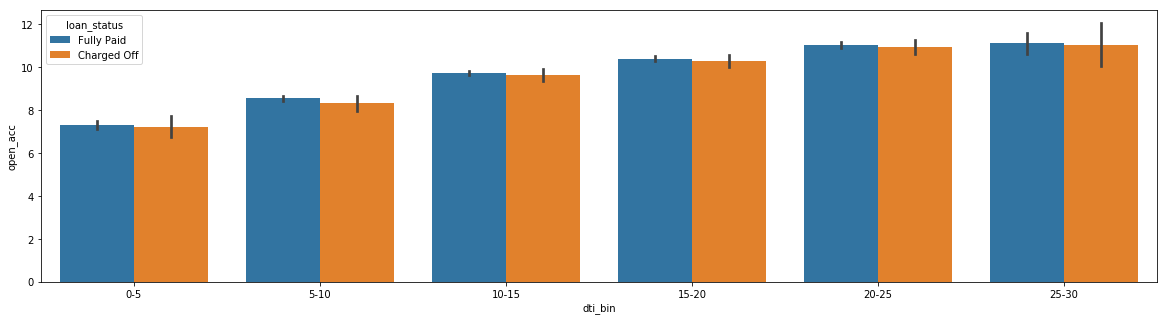

In [90]:
# dti versus open_acc versus loan_status
plt.figure(figsize=(20,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=loan)
plt.show()

__Observation__: The number of open credit lines in the borrower's credit file increases with dti. In each dti bin, charged-off is slightly higher than Fully_paid loans.

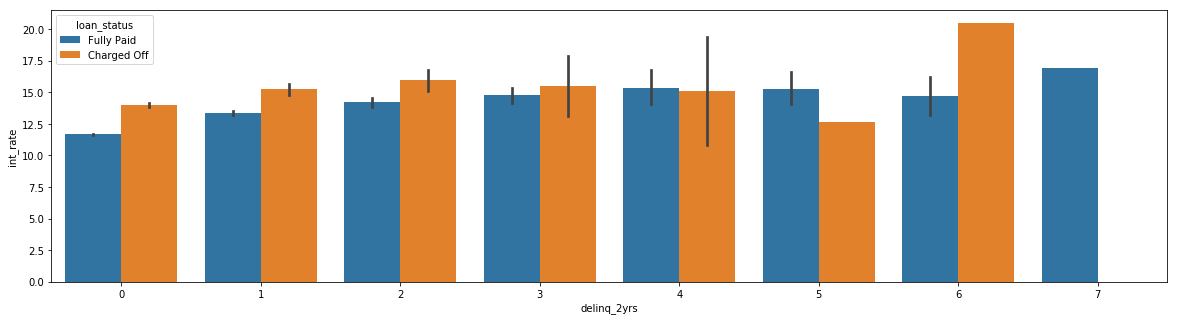

In [91]:
# delinq_2yrs versus int_rate versus loan_status
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=loan)
plt.show()

__Observation__: interest rate increases with the number of deliquency of the borrower.

In [92]:
# Finally let us see the correlation of different variables in Lending Club
corr=loan.corr()
corr['loan_amnt']

loan_amnt                   1.000000
funded_amnt                 0.979516
funded_amnt_inv             0.950263
term                        0.372770
int_rate                    0.320036
installment                 0.921353
emp_length                  0.158861
annual_inc                  0.241247
dti                         0.058231
delinq_2yrs                -0.032428
inq_last_6mths              0.002761
open_acc                    0.153086
pub_rec                    -0.058662
revol_bal                   0.344832
revol_util                  0.068297
total_acc                   0.252916
last_pymnt_amnt             0.464263
pub_rec_bankruptcies       -0.042904
issue_d_month               0.051352
issue_d_year                0.119714
earliest_cr_line_month     -0.029037
earliest_cr_line_year      -0.211303
last_pymnt_d_month         -0.002599
last_pymnt_d_year           0.117053
last_credit_pull_d_month   -0.006876
last_credit_pull_d_year     0.048239
loan_status_new             0.064259
i

<Figure size 1440x1440 with 0 Axes>

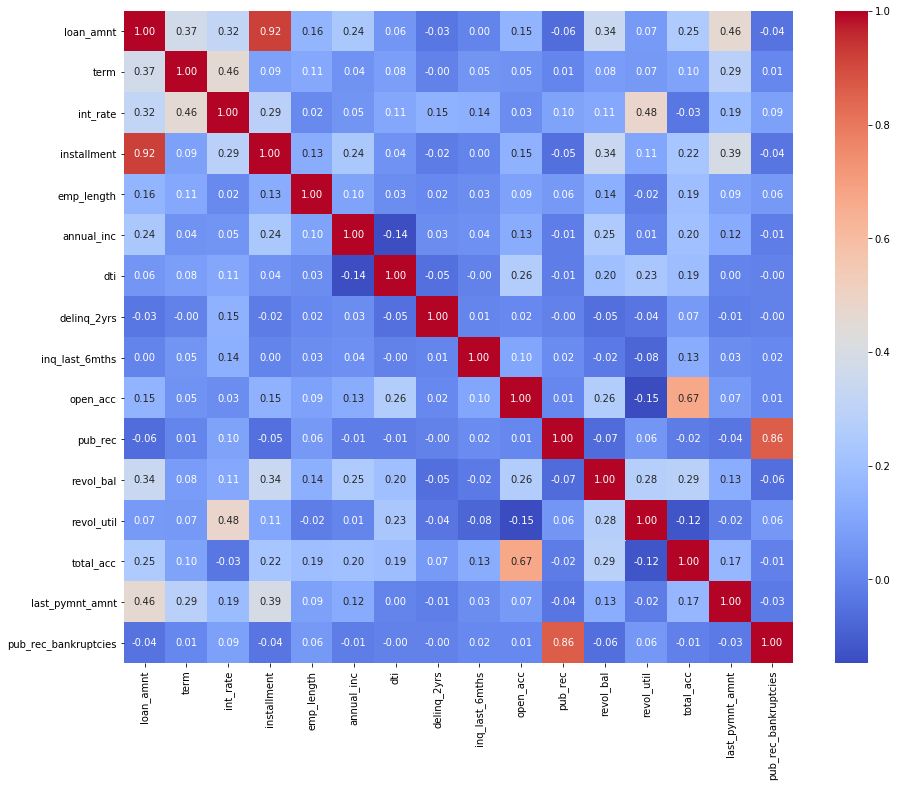

In [93]:
# Now, let us plot the heat map with above correlation
plt.figure(figsize=(20,20))
var= ['loan_amnt','term', 'int_rate', 'installment','emp_length', 'annual_inc','dti', 'delinq_2yrs','inq_last_6mths', 
      'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc', 'last_pymnt_amnt', 
       'pub_rec_bankruptcies','issue_d','earliest_cr_line', 'last_pymnt_d','last_credit_pull_d']
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(loan[var].corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)


__Observation__: The linearly correlated features are:

- "installment" vs "loan_amnt" (0.92)
- "pub_rec_bankruptcies" vs "pub_rec" (0.86)
- "total_acc" vs "open_acc" (0.67)
- "loan_amnt" vs "last_payment_amount" (0.46)
- "int_rate" vs "revol_util" (0.48) - Company is charging high int_rate for riskier loan

__Final recommenations__:
1. Reduce the number of loans where term is ‘60 months’ as they are likely to default more compared to ‘36 months’.
2. Reduce the number of approvals where the purpose of loan is “small_business”.
3. Stop approving high amount loan to people with less annual income as they are likely to default more.
4. Reduce approving loans to ‘Other’ under Home_ownership as they are likely to default more.
5. Reduce number of approvals for loans where installment is greater than 400
6. Stop approving loans where revolving line utilization rate is greater than 75%.
7. Stop approving loans to people with previous bad record. Having even 1 bad record has high default probability.
8. Charge higher interest rates for loans with dti greater than 15.